In [1]:
# Necessary imports for data checking and visualization
import numpy as np                 # model arrays
import pandas as pd                # DataFrames
import matplotlib.pyplot as plt    # building plots
import seaborn as sns              # Plotting help
import os        
from sklearn.impute import KNNImputer # imputing data
from sklearn.experimental import enable_iterative_imputer # required for MICE imputation
from sklearn.impute import IterativeImputer# accessing the operating system

In [2]:
# Make sure all columns are displayed when using dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Relative paths used since assumption is that user is in root directory of forked Git repo.
well_data = pd.read_csv("wellData.csv")      # load the well data in
daily_data = pd.read_csv("dailyData.csv")    # load the daily data in
solution_data = pd.read_csv("solution.csv")  # load the solution data in
solution_data["Fail in 30 days"] = 0                       # Initialize solutions with 0
solution_data = solution_data.rename(columns={"Fail in 30 days": "Failed"})

In [4]:
# Preview well data
well_data.head(2)

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR


In [5]:
# Preview daily data
daily_data.head(2)

,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,AL_Key,Well_ID
0,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
1,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345


In [6]:
# Preview the solution data
solution_data.head(2)

,Well_ID,AL_Key,Failed
0,327,ESP_1,0
1,125,ESP_2,0


In [7]:
# Combine all data into one dataframe
combined_data = pd.merge(pd.merge(well_data, daily_data, on=["Well_ID", "AL_Key"], how="left"), 
                         solution_data, on=["Well_ID", "AL_Key"], how="left")
combined_data["Failed"] = combined_data["Failed"].replace(np.nan, 1)
combined_data = combined_data.drop(columns=["Unnamed: 0"])
combined_data.head(2)

,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
# Backfill NaN values in OIL, GAS, and Water columns
combined_data["OIL"].fillna(method="bfill", inplace=True)
combined_data["GAS"].fillna(method="bfill", inplace=True)
combined_data["WATER"].fillna(method="bfill", inplace=True)


In [9]:
# Insert new ratios and features in dataframe
combined_data.insert(15, "GAS/OIL", combined_data["GAS"] / combined_data["OIL"])
combined_data.insert(16, "GAS/FLUID", combined_data["GAS"] / (combined_data["OIL"] + combined_data["WATER"]))
combined_data.insert(17, "SLOPE_GAS/OIL", combined_data["GAS/OIL"].diff())

In [10]:
# Creates a dataframe with only the data for the wells that haven't failed
solution_data = combined_data[combined_data["Failed"]==0]
solution_data.head(2)

,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
838,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.48168,ELECTRICAL,UNKNOWN,178.181226,145.721524,0.817828,0.448434,-1.071360,146.775146,ESP,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
839,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.48168,ELECTRICAL,UNKNOWN,1270.565335,813.464403,0.640238,0.316639,-0.177589,1298.498026,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
# Make dataframe for failed pumps
failed_data = combined_data[combined_data["Failed"]==1]
failed_data.head(2)


,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,615.154601,650.447788,1.057373,0.569747,NaN,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1224.193640,1232.455787,1.006749,0.606044,-0.050624,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


['ESP_Motor_Frequency_Rating', 'ESP_Motor_Current_Rating', 'ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating'] were missing at least 50.0% of their data


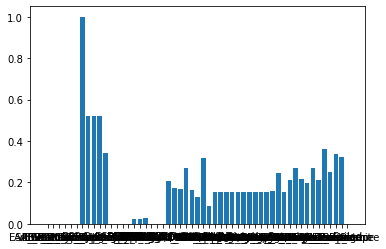

In [12]:
# Compute the completeness histogram for a given dataset
def completeness(df, cutoff=0.75):
    df_temp = df.copy(deep=True)                 # make a deep copy of the DataFrame
    df_bool = df_temp.isnull()
    features = list(df_bool.columns)
    percent_missing = []
    past_cutoff = []
    for feature in features:
        num_missing = df_bool[feature].sum()
        proportion_missing = df_bool[feature].sum() / len(df_bool)
        percent_missing.append(proportion_missing)
        if proportion_missing >= cutoff:
            past_cutoff.append(feature)
        # print(f'{feature}: {proportion_missing:.4f}')
    plt.bar(features, percent_missing)
    print(f'{past_cutoff} were missing at least {cutoff*100}% of their data')
completeness(solution_data, 0.5)


In [13]:
# Calculate the (spearman) correlation between all features in a dataframe.
def correlation(df, cutoff=0.75):
    corr = df.corr(method='spearman')
    correlated = []
    inversely_correlated = []
    for feature in corr:
        for feature2 in corr:
            correlation = corr[feature][feature2]
            if str(feature) == str(feature2):
                pass
            elif correlation >= cutoff:
                correlated.append((feature, feature2))
            elif correlation <= -cutoff:
                inversely_correlated.append((feature, feature2))
    print(f'Items listed here: {correlated} are correlated by a coefficient of at least {cutoff}')
    print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f'Items listed here: {inversely_correlated} are inversely correlated by a coefficient of at greatest -{cutoff}')
correlation(combined_data)

Items listed here: [('ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating'), ('ESP_Motor_Voltage_Rating', 'Lower_Limit'), ('ESP_Motor_Power_Rating', 'ESP_Motor_Voltage_Rating'), ('OIL', 'Oil_Intake'), ('OIL', 'Liquid_Intake'), ('OIL', 'Gas_through_ESP'), ('OIL', 'ESP_Fluid'), ('GAS', 'Gas_through_ESP'), ('GAS/OIL', 'GAS/FLUID'), ('GAS/OIL', 'Gas_Saturation_at_Intake'), ('GAS/FLUID', 'GAS/OIL'), ('GAS/FLUID', 'Gas_Saturation_at_Intake'), ('GAS/FLUID', 'Gas_through_ESP_Intake'), ('GAS/FLUID', 'Gas_Saturation_in_Pump'), ('WATER', 'Water_Intake'), ('WATER', 'Liquid_Intake'), ('WATER', 'Pump_Power'), ('ESP Data - Drive Current', 'Drive_Power'), ('ESP Data - Drive Voltage', 'ESP Data - Output Frequency'), ('ESP Data - Output Frequency', 'ESP Data - Drive Voltage'), ('Oil_Intake', 'OIL'), ('Oil_Intake', 'Liquid_Intake'), ('Oil_Intake', 'Gas_through_ESP'), ('Oil_Intake', 'ESP_Fluid'), ('Water_Intake', 'WATER'), ('Water_Intake', 'Liquid_Intake'), ('Water_Intake', 'Pump_Power'), ('Gas_Intake', 'G

In [14]:
# # Create data completeness histogram using the solution data

# # CREDIT PYRCZ LATER -- HIS CODE
# df_temp = solution_data.copy(deep=True)                 # make a deep copy of the DataFrame

# df_bool = df_temp.isnull()                              # true is value, false if NaN
# #df_bool = df_bool.set_index(df_temp.pop('UWI'))        # set the index / feature for the heat map y column
# heat = sns.heatmap(df_bool, cmap=['r','w'], annot=False, fmt='.0f',cbar=False,linecolor='black',linewidth=0.001) # make the binary heat map, no bins
# heat.set_xticklabels(heat.get_xticklabels(), rotation=90, fontsize=8)
# heat.set_yticklabels(heat.get_yticklabels(), rotation=0, fontsize=8)
 
# heat.set_title('Data Completeness Heatmap',fontsize=16); heat.set_xlabel('Feature',fontsize=12); heat.set_ylabel('Sample (Index)',fontsize=12)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=3, wspace=0.2, hspace=0.2) # plot formatting
# plt.show()

In [15]:
# Data Imputation

min_viable2 = combined_data.drop(columns=['Artificial_Lift_Type',
       'AL_Bottom_Depth', 'ESP_Pump_Stages',
       'ESP_Motor_Frequency_Rating', 'ESP_Motor_Current_Rating',
       'ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating',
       'DLS_at_Set_Depth', 'GAS', 'WATER', 'ARTIFICIAL_LIFT',
       'DOWN_TIME_HOURS', 'ESP Data - Drive Current',
       'ESP Data - Drive Voltage', 'ESP Data - Intake Pressure',
       'ESP Data - Motor Temperature Shutdown Setpoint',
       'ESP Data - Motor Winding Temperature', 'ESP Data - Output Frequency',
       'Startup_Count', 'Oil_Intake', 'Water_Intake',
       'Gas_Intake', 'Liquid_Intake', 'Gas_Saturation_at_Intake',
       'Gas_Separator_Efficiency', 'Gas_through_Annulus_Intake',
       'Gas_through_ESP_Intake', 'Gas_through_Annulus', 'Gas_through_ESP',
       'Discharge_Pressure', 'ESP_Fluid',
       'Gas_Saturation_at_Discharge', 'Pump_Delta_Pressure',
       'Pump_Average_Pressure', 'Gas_Saturation_in_Pump',
       'Drive_Power', 'Power_Difference', 'ESP_Temperature',
       'Lower_Limit', 'Failed'])
print(min_viable2.head())

   Well_ID AL_Key  DLS_Critical Failure_Type Failure_Type_Detail          OIL  \
0      345  ESP_2      5.323174   ELECTRICAL               MOTOR   615.154601   
1      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1224.193640   
2      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1007.769762   
3      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1514.641876   
4      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1089.741764   

    GAS/OIL  GAS/FLUID  SLOPE_GAS/OIL  ESP Data - Vibration X  Pb_ESP  \
0  1.057373   0.569747            NaN                     NaN     NaN   
1  1.006749   0.606044      -0.050624                     NaN     NaN   
2  1.038996   0.624853       0.032247                     NaN     NaN   
3  0.904599   0.519628      -0.134397                     NaN     NaN   
4  1.272905   0.617628       0.368307                     NaN     NaN   

   Pump_Power  Power_Ratio  
0         NaN          NaN  
1         NaN   

In [16]:
completeness(min_viable, 0.5)
plt.xlabel("% Data Missing")
plt.ylabel("Feature")
plt.title("Completeness of New Dataset")

NameError: name 'min_viable' is not defined

In [17]:
# Method to replace the NaN values in a dataset
def count_and_replace_nan(dataset, feature, replacement_value):
    num_nan = sum(dataset[feature].isna())
    print(f"Number of NaN values in {feature} is {num_nan} out of {len(dataset)} values")
    if replacement_value == "bf":
        new = dataset[feature].fillna(method="bfill", inplace=True)
        print(f"NaN values have been replaced by back-filling")
    elif replacement_value == "ff":
        dataset[feature].fillna(method="ffill", inplace=True)
        print(f"NaN values have been replaced by forward-filling")
    else:
        dataset[feature].fillna(replacement_value, inplace=True)
        print(f"NaN values have been replaced with {replacement_value}")
    return dataset

In [18]:
# print(min_viable2.head()) OR KNN.
df_mice = min_viable2.copy(deep=True)                         # make a deep copy of the DataFrame
df_mice.drop(columns=["Well_ID", "AL_Key", "Failure_Type","Failure_Type_Detail"], inplace=True)
#count = np.isinf(df_mice).values.sum()
#print("It contains " + str(count) + " infinite values")
df_mice.replace([np.inf, -np.inf], np.nan, inplace=True)
#count = np.isinf(df_mice).values.sum()
#print("It contains " + str(count) + " infinite values")
mice_imputer = IterativeImputer()
df_mice.iloc[:,:] = mice_imputer.fit_transform(df_mice)
print(df_mice.head(20))

    DLS_Critical          OIL   GAS/OIL  GAS/FLUID  SLOPE_GAS/OIL  \
0       5.323174   615.154601  1.057373   0.569747      -1.613787   
1       5.323174  1224.193640  1.006749   0.606044      -0.050624   
2       5.323174  1007.769762  1.038996   0.624853       0.032247   
3       5.323174  1514.641876  0.904599   0.519628      -0.134397   
4       5.323174  1089.741764  1.272905   0.617628       0.368307   
5       5.323174  1241.222000  1.303211   0.652711       0.030306   
6       5.323174  1407.687407  1.408483   0.773740       0.105272   
7       5.323174  1205.098398  1.510075   0.793335       0.101592   
8       5.323174  1307.663836  1.355189   0.791579      -0.154886   
9       5.323174  1194.901846  0.914685   0.442284      -0.440504   
10      5.323174  1349.772675  1.327571   0.829693       0.412886   
11      5.323174  1324.995927  1.465930   1.129336       0.138359   
12      5.323174  1447.734748  1.310058   1.037109      -0.155872   
13      5.323174  1263.130530  1.4

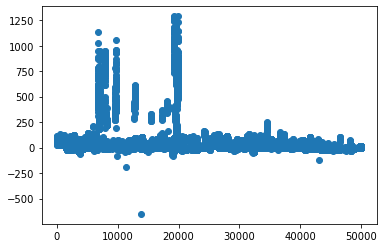

In [19]:
plt.scatter(range(len(df_mice)), df_mice["ESP Data - Vibration X"])

In [20]:
df_knn = min_viable2.copy(deep=True)                            # make a deep copy of the DataFrame
df_knn.drop(columns=["Well_ID", "AL_Key", "Failure_Type","Failure_Type_Detail"], inplace=True)
# count = np.isinf(df_knn).values.sum()
# print("It contains " + str(count) + " infinite values")
df_knn.replace([np.inf, -np.inf], np.nan, inplace=True)
#count = np.isinf(df_knn).values.sum()
#print("It contains " + str(count) + " infinite values")
print(df_knn.head())

   DLS_Critical          OIL   GAS/OIL  GAS/FLUID  SLOPE_GAS/OIL  \
0      5.323174   615.154601  1.057373   0.569747            NaN   
1      5.323174  1224.193640  1.006749   0.606044      -0.050624   
2      5.323174  1007.769762  1.038996   0.624853       0.032247   
3      5.323174  1514.641876  0.904599   0.519628      -0.134397   
4      5.323174  1089.741764  1.272905   0.617628       0.368307   

   ESP Data - Vibration X  Pb_ESP  Pump_Power  Power_Ratio  
0                     NaN     NaN         NaN          NaN  
1                     NaN     NaN         NaN          NaN  
2                     NaN     NaN         NaN          NaN  
3                     NaN     NaN         NaN          NaN  
4                     NaN     NaN         NaN          NaN  


In [21]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_knn.iloc[:,:] = knn_imputer.fit_transform(df_knn)
print(df_knn.head(20))

    DLS_Critical          OIL   GAS/OIL  GAS/FLUID  SLOPE_GAS/OIL  \
0       5.323174   615.154601  1.057373   0.569747       0.045168   
1       5.323174  1224.193640  1.006749   0.606044      -0.050624   
2       5.323174  1007.769762  1.038996   0.624853       0.032247   
3       5.323174  1514.641876  0.904599   0.519628      -0.134397   
4       5.323174  1089.741764  1.272905   0.617628       0.368307   
5       5.323174  1241.222000  1.303211   0.652711       0.030306   
6       5.323174  1407.687407  1.408483   0.773740       0.105272   
7       5.323174  1205.098398  1.510075   0.793335       0.101592   
8       5.323174  1307.663836  1.355189   0.791579      -0.154886   
9       5.323174  1194.901846  0.914685   0.442284      -0.440504   
10      5.323174  1349.772675  1.327571   0.829693       0.412886   
11      5.323174  1324.995927  1.465930   1.129336       0.138359   
12      5.323174  1447.734748  1.310058   1.037109      -0.155872   
13      5.323174  1263.130530  1.4

In [22]:
# Create a matrix with our prioritized features
matrix = pd.DataFrame()
matrix = matrix.assign(Well_ID=combined_data["Well_ID"],
              AL_Key=combined_data["AL_Key"],
              AL_Bottom_Depth=combined_data["AL_Bottom_Depth"],
              DLS_Critical=combined_data["DLS_Critical"],
              DLS_at_Set_Depth=combined_data["DLS_at_Set_Depth"],
              Failed=combined_data["Failed"])


In [23]:
matrix.head(2)

,Well_ID,AL_Key,AL_Bottom_Depth,DLS_Critical,DLS_at_Set_Depth,Failed
0,345,ESP_2,9056.67,5.323174,1.713554,1.0
1,345,ESP_2,9056.67,5.323174,1.713554,1.0


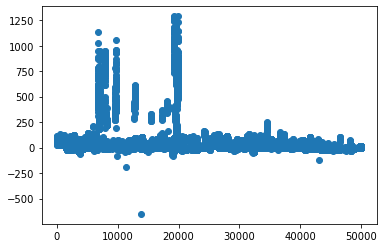

In [24]:
plt.scatter(range(len(df_knn)), df_mice["ESP Data - Vibration X"])

In [25]:
min_viable["ESP Data - Vibration X"] = df_mice["ESP Data - Vibration X"]

NameError: name 'min_viable' is not defined

In [ ]:
min_viable

In [ ]:
# Simplest model first
# Add gas fluid ratio
# Keep: Dogleg at critical point, Well_ID, AL_Key, Bottom_Depth
# Drop: Artificial lift type, all ratings, drop failure types, Pump_Stages

# Dynamic:
# Add: Gas fluid ratio, Gas oil diff
# Keep: Well_ID, AL_Key, Pump Power, Gas over Oil, Gas Fluid, Vibration, Cumulative Oil, Gas oil diff 
# Drop: Oil Intage, Water Intake, Gas Intake, Artificial Lift Type, do correlation

In [ ]:
completeness(min_viable, 0.5)

In [ ]:
well_data["DLS_Critical"].fillna(well_data["DLS_Critical"].mean(), inplace=True)
well_data.head()

In [ ]:
# Function to separate a feature by time intervals
def separate_intervals(dataset, feature):
    grouped_data=combined_data.groupby(["Well_ID","AL_Key"])
    array_life=np.array(grouped_data.size())
    mega_matrix=np.array(grouped_data)
    test_array=np.array(dataset) # Get the Well_ID
    list_sort=[]
    list_fail=[]
    for i in range (0,len(mega_matrix)):
        flag=0
        for k in range(0,len(test_array)):        
            if mega_matrix[i][0][0] == test_array[k][0] and mega_matrix[i][0][1] == test_array[k][1]:
                list_sort.append(i)
                flag=1            
        if flag==0:
            list_fail.append(i)
    mega_s=mega_matrix[list_sort]
    mega_s_life=array_life[list_sort]

    
    mega_f=mega_matrix[list_fail]
    mega_f_life=array_life[list_fail]



    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time][feature].diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end][feature].diff().mean()
        army.append(soldier)
    print(old_folks)
    print("HERE")
    print(army)
    return( ([old_folks, army]) )
separate_intervals(min_viable, "OIL")

In [ ]:
separate_intervals = separate_intervals(min_viable, "OIL")
print(separate_intervals)

In [ ]:
min_viable.head()

In [ ]:
features_to_test = ["DLS_Critical", "GAS/OIL", "GAS/FLUID", "SLOPE_GAS/OIL",
                    "ESP Data - Vibration X", "Pump_Power", "ESP Data - Vibration X"]
time_series_list = []
''''for feature in features_to_test:
    print("Feature:", feature)
    separated_intervals = separate_intervals(min_viable, feature)
    print(separate_intervals)
    separated_intervals.insert(0, feature)
    time_series_list.append(separated_intervals)
print(time_series_list)'''

list_sort=[]
list_fail=[]
for i in range (0,len(mega_matrix)):
    flag=0
    for k in range(0,len(solution_array)):        
        if mega_matrix[i][0][0] == solution_array[k][0] and mega_matrix[i][0][1] == solution_array[k][1]:
            list_sort.append(i)
            flag=1            
    if flag==0:
        list_fail.append(i)
mega_s=mega_matrix[list_sort]
mega_s_life=array_life[list_sort]


mega_f=mega_matrix[list_fail]
mega_f_life=array_life[list_fail]

In [ ]:
combined_data.head()
combined_data["ESP Data - Vibration X"] = df_mice["ESP Data - Vibration X"]

In [ ]:
    grouped_data=combined_data.groupby(["Well_ID","AL_Key"])
    array_life=np.array(grouped_data.size())
    solution_data = pd.read_csv("solution.csv") # Changed here
    mega_matrix=np.array(grouped_data)
    test_array=np.array(solution_data)
    list_sort=[]
    list_fail=[]
    for i in range (0,len(mega_matrix)):
        flag=0
        for k in range(0,len(test_array)):        
            if mega_matrix[i][0][0] == test_array[k][0] and mega_matrix[i][0][1] == test_array[k][1]:
                list_sort.append(i)
                flag=1            
        if flag==0:
            list_fail.append(i)
    mega_s=mega_matrix[list_sort]
    mega_s_life=array_life[list_sort]

    
    mega_f=mega_matrix[list_fail]
    mega_f_life=array_life[list_fail]


    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["OIL"].diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.9).round(0))
        end=overall_time-int((overall_time*0.7).round(0))
        soldier=mega_f[i][1][start:end]["OIL"].diff().mean()
        army.append(soldier)

''''army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["OIL"] = np.array(main_arr)

    
data_df'''

In [ ]:
grouped_data.head()

In [ ]:
# Oil production Standard deviation.
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["OIL"].std()
    old_folks.append(alpha)

army=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["OIL"].std()
    army.append(soldier)


# Adding values to a dataframe. First (0-army) Second(1-old).

army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df = pd.DataFrame(np.array(main_arr),columns = ["Oil Production"])    
data_df["Target"] = y 
    
data_df

In [ ]:
# Gas/oil ratio     
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["GAS/OIL"].diff().mean()
    old_folks.append(alpha)

army=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["GAS/OIL"].diff().mean()
    army.append(soldier)
        
army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["GAS/OIL"] = np.array(main_arr)

    
data_df

In [ ]:
# Standard Deviation of Gas/Oil    
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["GAS/OIL"].std()
    old_folks.append(alpha)

army=[]
for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["GAS/OIL"].std()
    army.append(soldier)
        
army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["GAS/OIL(std)"] = np.array(main_arr)

    
data_df

In [ ]:
# Gas/fluid slope.    
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["GAS/FLUID"].diff().mean()
    old_folks.append(alpha)

army=[]
for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["GAS/FLUID"].diff().mean()
    army.append(soldier)
    
army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["GAS/FLUID"] = np.array(main_arr)

    
data_df

In [ ]:
# Gas/Fluid standard deviation.    
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["GAS/FLUID"].std()
    old_folks.append(alpha)

army=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["GAS/FLUID"].std()
    army.append(soldier)


army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["GAS/FLUID(std)"] = np.array(main_arr)

    
data_df

In [ ]:
# Static features.    
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["AL_Bottom_Depth"].mean()
    old_folks.append(alpha)

army=[]
for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["AL_Bottom_Depth"].mean()
    army.append(soldier)
        
army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["AL_Bottom_Depth"] = np.array(main_arr)
data_df['AL_Bottom_Depth'] = (data_df['AL_Bottom_Depth']) / (data_df['AL_Bottom_Depth'].abs().max())
    
data_df

In [ ]:
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["DLS_Critical"].mean()
    old_folks.append(alpha)

army=[]
for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["DLS_Critical"].mean()
    army.append(soldier)
        

army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["DLS_Critical"] = np.array(main_arr)
data_df['DLS_Critical'] = (data_df['DLS_Critical']) / (data_df['DLS_Critical'].abs().max())
    
data_df

In [ ]:
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["OIL"].diff().mean()
    old_folks.append(alpha)

army=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["OIL"].diff().mean()
    army.append(soldier)

army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["OIL"] = np.array(main_arr)

    
data_df

In [ ]:
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["ESP Data - Vibration X"].diff().mean()
    old_folks.append(alpha)

army=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["ESP Data - Vibration X"].diff().mean()
    army.append(soldier)

army_arr = (np.array(army))
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["ESP Data - Vibration X"] = np.array(main_arr)

    
data_df

In [ ]:
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha1=mega_f[i][1][senior:overall_time]["OIL"].sum()
    alpha2=mega_f[i][1][0:overall_time]["OIL"].sum()
    alpha3=alpha1/alpha2
    old_folks.append(alpha3)

army=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier1=mega_f[i][1][start:end]["OIL"].sum()
    soldier2=mega_f[i][1][0:end]["OIL"].sum()
    soldier3=soldier1/soldier2
    army.append(soldier3)
    
army_arr2 = np.array(army)
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr2,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["Percentage Cumulative"] = np.array(main_arr)

In [ ]:
old_folks=[]

for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_f[i][1][senior:overall_time]["OIL"].diff().diff().mean()
    old_folks.append(alpha)

army=[]
for i in range (len(mega_f)):
    overall_time=mega_f_life[i]
    start=overall_time-int((overall_time*0.9).round(0))
    end=overall_time-int((overall_time*0.7).round(0))
    soldier=mega_f[i][1][start:end]["OIL"].diff().diff().mean()
    army.append(soldier)
    
army_arr2 = np.array(army)
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((army_arr2,old_folks_arr))

zero = np.zeros(shape = (len(mega_f),1))
ones = np.ones(shape = (len(mega_f),1))

y = np.vstack((zero,ones))

data_df["B"] = np.array(main_arr)

In [ ]:
data_df.isnull().sum().sum()

In [ ]:
data_df["AL_Bottom_Depth"].values.max()

In [ ]:
data_df = data_df.fillna(method = 'backfill')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from tpot import TPOTClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_df = data_df[data_df["GAS/OIL"] <= 10]
data_df = data_df[data_df["GAS/FLUID"] <= 10]

In [ ]:
data_df = data_df[data_df["GAS/OIL(std)"] <= 100]
data_df = data_df[data_df["OIL"] >= -50]
data_df = data_df[data_df["OIL"] <= 50]

In [ ]:
sns.boxplot(y = data_df['GAS/OIL'])

In [ ]:
X_data = data_df[['GAS/OIL','OIL','GAS/OIL(std)', 'GAS/FLUID', 'GAS/FLUID(std)', 'AL_Bottom_Depth', 'DLS_Critical','B','ESP Data - Vibration X']]

In [ ]:
y = data_df['Target']

In [ ]:
    X_train, X_test, y_train, y_test = train_test_split(X_data,y)
    tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

In [ ]:
print(tpot.score(X_test, y_test))

In [ ]:
clf2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Random Forest
clf = RandomForestClassifier(max_depth=6, random_state=0, min_samples_split=3,n_estimators = 1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# For the Solution Data
old_folks=[]
wellid = []
pumpn = []

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["OIL"].diff().diff().mean()
    old_folks.append(alpha)
    wellid.append(mega_s[i][0][0])
    pumpn.append(mega_s[i][0][1])


    
old_folks_arr = (np.array(old_folks))
wellid_arr = np.array(wellid)
pump_arr = np.array(pumpn)

sol_df = pd.DataFrame(np.array(wellid),columns = ["Well_ID"])
sol_df["Pump_ID"] = np.array(pumpn)

main_arr = np.hstack((old_folks_arr))

sol_df["Oil"] = np.array(main_arr)

In [ ]:
# Gas/oil ratio     
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["GAS/OIL"].diff().mean()
    old_folks.append(alpha)

        
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["GAS/OIL"] = np.array(main_arr)

    
sol_df

In [ ]:
# Gas/oil standard deviation.    
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["GAS/OIL"].std()
    old_folks.append(alpha)

        
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["GAS/OIL(std)"] = np.array(main_arr)

    
sol_df

In [ ]:
# Gas/fluid ratio slope     
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["GAS/FLUID"].diff().mean()
    old_folks.append(alpha)

        
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["GAS/FLUID"] = np.array(main_arr)


sol_df

In [ ]:
# Gas/Fluid standard deviation
old_folks = []

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["GAS/FLUID"].std()
    old_folks.append(alpha)
    
        
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["GAS/FLUID(std)"] = np.array(main_arr)

    
sol_df

In [ ]:
# Static features.    
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["AL_Bottom_Depth"].mean()
    old_folks.append(alpha)
    
        
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["AL_Bottom_Depth"] = np.array(main_arr)

sol_df['AL_Bottom_Depth'] = (sol_df['AL_Bottom_Depth']) / (sol_df['AL_Bottom_Depth'].abs().max())

    
sol_df

In [ ]:
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["DLS_Critical"].mean()
    old_folks.append(alpha)
    
        
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["DLS_Critical"] = np.array(main_arr)

sol_df['DLS_Critical'] = (sol_df['DLS_Critical']) / (sol_df['DLS_Critical'].abs().max())

    
sol_df

In [ ]:
# Oil production data.
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["OIL"].diff().mean()
    old_folks.append(alpha)
    
        
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["OIL"] = np.array(main_arr)

    
sol_df

In [ ]:
# Vibration Data.
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["ESP Data - Vibration X"].diff().mean()
    old_folks.append(alpha)
    
    
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["ESP Data - Vibration X"] = np.array(main_arr)

    
sol_df

In [ ]:
# 'B' Feature
old_folks=[]

for i in range (len(mega_s)):
    overall_time=mega_s_life[i]
    senior=overall_time-int((overall_time*0.1).round(0))
    alpha=mega_s[i][1][senior:overall_time]["OIL"].diff().diff().mean()
    old_folks.append(alpha)
    
old_folks_arr = (np.array(old_folks))
main_arr = np.hstack((old_folks_arr))


sol_df["B"] = np.array(main_arr)

    
sol_df

In [ ]:
# Checking the solution dataset

In [ ]:
sol_df = sol_df.fillna(method = 'backfill')

In [ ]:
sol_df = sol_df[sol_df["GAS/OIL"] <= 10]
sol_df = sol_df[sol_df["GAS/FLUID"] <= 10]

sol_df = sol_df[sol_df["GAS/OIL(std)"] <= 100]
sol_df = sol_df[sol_df["OIL"] >= -50]
sol_df = sol_df[sol_df["OIL"] <= 50]

In [ ]:
X_data = sol_df[['Oil','GAS/OIL','OIL','GAS/OIL(std)', 'GAS/FLUID', 'GAS/FLUID(std)', 'AL_Bottom_Depth', 'DLS_Critical','B','ESP Data - Vibration X']]

In [ ]:
y_pred = clf.predict(X_data)

In [ ]:
y_pred

In [ ]:
# SVM
y_pred_svm = clf2.predict(X_data)

In [ ]:
y_pred_svm

In [ ]:
sol_df.head()

In [ ]:
plt.hist(sol_df["GAS/FLUID"])